In [0]:
# Tokenizing function 
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [2]:
!pip install squarify

In [3]:
!pip install nltk

In [0]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy.cli
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

In [6]:
# using colab we must download the package first 
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 826.9MB 1.1MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.1.0-cp36-none-any.whl size=828255076 sha256=968a5e3279e0860b702a3afac2db691c33529634ba316a8379e69d39be3bc70f
  Stored in directory: /tmp/pip-ephem-wheel-cache-dcgy5j36/wheels/b4/d7/70/426d313a459f82ed5e06cc36a50e2bb2f0ec5cb31d8e0bdf09
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


Have to restart Runtime after downloading 

In [0]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [0]:
df = pd.read_parquet('review.parquet')

In [7]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
609090,IfFo03nj-PQGTzTdxH8vWA,SxrGc9Qv8b_DWo6DZOeyng,FvVSy2r7_zDEhZWqLgjXNQ,3,0,2,0,The food was great no denying that. I'm trying...,2012-12-02 20:46:30
6460377,L46X3SlvO88xtlusGr1hFg,HOzgd-a-kAiVZappPn5yGA,ERfGoZcgrmF8p89FIs9_TA,5,2,0,1,"Delivered as promised, when promised!\n Excell...",2015-01-11 18:53:04
562100,EcxvP_LcXS2MGgxvNXwCwg,hmqaQ_60rCJi86ur1kYg8g,m65oi2C7b1CJM7DaXbFi-g,5,2,1,1,Came by again with a friend just to hang out. ...,2018-01-06 06:53:10
5339718,a1q77QOPmEJK75FgdfEjDA,qAeiX_1IOEjr56QjRjaBxA,RV__lDpb_Vo4SmSL2r5ezA,5,0,1,1,I called Real Fast Auto Glass to get the winds...,2015-05-12 15:25:27
2958710,gsPiT4oi6rdj9MZt8rfm7w,pFfZdrY_EbDlTxEwKbZl3A,YCoLBgh973QSp-OmnwMWSg,2,2,2,1,"Terrible shuttle service, pretty good service ...",2011-07-13 14:11:37


In [8]:
# Count the raw text
df['text'].value_counts(normalize=True)[:50]

Baja chimi... yum!!!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [0]:
df['tokens'] = df['text'].apply(tokenize)

In [10]:
df['tokens'].head()

609090     [the, food, was, great, no, denying, that, im,...
6460377    [delivered, as, promised, when, promised, exce...
562100     [came, by, again, with, a, friend, just, to, h...
5339718    [i, called, real, fast, auto, glass, to, get, ...
2958710    [terrible, shuttle, service, pretty, good, ser...
Name: tokens, dtype: object

# Analyzing Tokens 

In [11]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
df['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 144851),
 ('and', 103697),
 ('i', 77007),
 ('a', 74840),
 ('to', 72907),
 ('was', 52204),
 ('of', 42308),
 ('is', 36005),
 ('it', 35997),
 ('for', 35292)]

## Create a fuction which takes a corpus of document and returns a dataframe of word counts for us to analyze.

In [0]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [0]:
# Use the Function
wc = count(df['tokens'])

In [14]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
11,the,23995,144851,1.0,0.049022,0.049022,0.897211
13,and,23906,103697,2.0,0.035094,0.084116,0.893883
0,i,19205,77007,3.0,0.026061,0.110177,0.718105
45,a,20899,74840,4.0,0.025328,0.135505,0.781446
50,to,20011,72907,5.0,0.024674,0.160179,0.748243


plot it

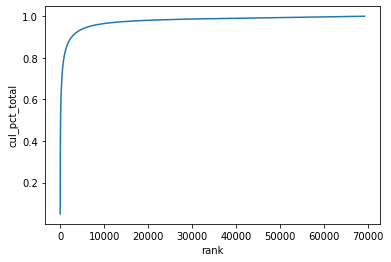

In [15]:
# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [16]:
wc[wc['rank'] <= 20]['cul_pct_total'].max()

0.31196335763365146

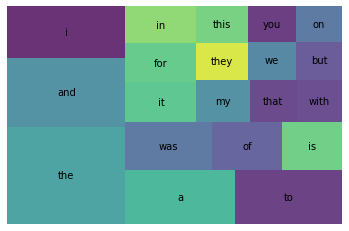

In [17]:
# Without Stop Words 
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

# Process the text with Spacy

In [0]:
# nlp = spacy.load("en_core_web_md")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [0]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(df['text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df['tokens'] = tokens

In [20]:
df['tokens'].head()

609090     [The, food, was, great, no, denying, that., I'...
6460377    [Delivered, as, promised,, when, promised!, \n...
562100     [Came, by, again, with, a, friend, just, to, h...
5339718    [I, called, Real, Fast, Auto, Glass, to, get, ...
2958710    [Terrible, shuttle, service,, pretty, good, se...
Name: tokens, dtype: object

In [0]:
wc = count(df['tokens'])

In [22]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
11,the,23149,120947,1.0,0.039488,0.039488,0.865577
13,and,23786,100989,2.0,0.032972,0.072459,0.889396
18,I,18973,76232,3.0,0.024889,0.097348,0.709430
50,a,20663,72857,4.0,0.023787,0.121135,0.772622
55,to,19919,71803,5.0,0.023443,0.144578,0.744803


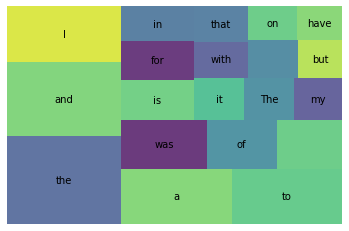

In [23]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Impliment Stop Words 

In [0]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(df['text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens

In [25]:
df.tokens.head()

609090     [food, great, denying, that., i'm, trying, cut...
6460377    [delivered, promised,, promised!, \n , excelle...
562100     [came, friend, hang, out., like, fixed, proble...
5339718    [called, real, fast, auto, glass, windshield, ...
2958710    [terrible, shuttle, service,, pretty, good, se...
Name: tokens, dtype: object

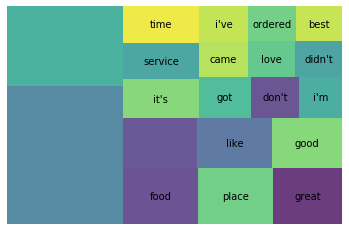

In [28]:
wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show();

In [0]:
STOP_WORDS = nlp.Defaults.stop_words.union(['I', 'i', 'it', "it's", 'it.', 'the', 'this',])

In [30]:
STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'I',
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',


In [0]:
tokens = []

for doc in tokenizer.pipe(df['text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [32]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
275,,9003,39118,1.0,0.024199,0.024199,0.336636
6,the,13413,25846,2.0,0.015989,0.040188,0.501533
64,\n\n,7902,22641,3.0,0.014006,0.054194,0.295468
5,food,7362,10242,4.0,0.006336,0.060530,0.275277
233,place,7539,10187,5.0,0.006302,0.066832,0.281895


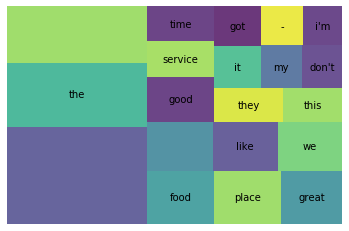

In [33]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

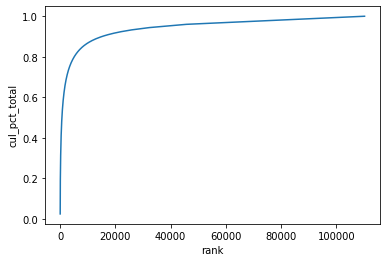

In [34]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [35]:
wc.head(50)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
275,,9003,39118,1.0,0.024199,0.024199,0.336636
6,the,13413,25846,2.0,0.015989,0.040188,0.501533
64,\n\n,7902,22641,3.0,0.014006,0.054194,0.295468
5,food,7362,10242,4.0,0.006336,0.060530,0.275277
233,place,7539,10187,5.0,0.006302,0.066832,0.281895
8,great,7082,9377,6.0,0.005801,0.072633,0.264807
27,\n,3325,9168,7.0,0.005672,0.078305,0.124327
60,like,6454,9144,8.0,0.005657,0.083961,0.241325
871,we,5468,9020,9.0,0.005580,0.089541,0.204457
213,good,6559,8682,10.0,0.005371,0.094912,0.245251


In [36]:
wc['appears_in_pct'].describe()

count    110232.000000
mean          0.000469
std           0.004371
min           0.000037
25%           0.000037
50%           0.000037
75%           0.000112
max           0.501533
Name: appears_in_pct, dtype: float64

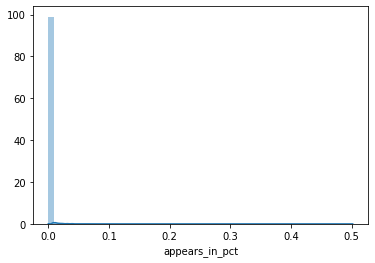

In [37]:
# Frequency of appears in documents
sns.distplot(wc['appears_in_pct']);

## Stemming 

In [0]:
ps = PorterStemmer()

## Lemas

In [0]:
# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [0]:
df['lemmas'] = df['text'].apply(get_lemmas)

In [43]:
df['lemmas'].head()

609090     [food, great, deny, try, cut, salt, intake, or...
6460377    [deliver, promise, promise, \n , Excellent, Cu...
562100     [come, friend, hang, like, fix, problem, waite...
5339718    [call, Real, Fast, Auto, Glass, windshield, re...
2958710    [terrible, shuttle, service, pretty, good, ser...
Name: lemmas, dtype: object

top 20

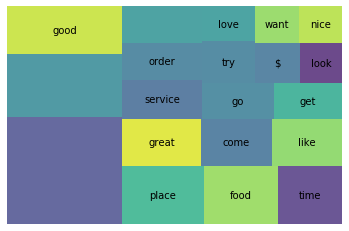

In [44]:
wc = count(df['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()